<a href="https://colab.research.google.com/github/MohanT3110/Projects/blob/main/E_commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecommerce - Customer Segmentation Project

Importing Libraries

In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date

In [ ]:
os.getcwd()

'/content'

Data Ingestion

In [ ]:
# Error in detecting dataset, utf-8 codec error
# !pip install chardet
import chardet

with open('e_commerce_sample.csv','rb') as f:
  encoding = chardet.detect(f.read())['encoding']


In [ ]:
dataset = pd.read_csv('e_commerce_sample.csv',encoding = encoding)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom


In [ ]:
dataset['TotalPrice'] = dataset['Quantity']*dataset['UnitPrice']

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom,19.95
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom,17.00
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom,17.85
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom,17.40
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom,51.00


EDA Analysis

In [ ]:
dataset.shape #Rows and Columns in dataframe

(75120, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   StockCode    75120 non-null  object 
 2   Description  74915 non-null  object 
 3   Quantity     75120 non-null  int64  
 4   InvoiceDate  75120 non-null  object 
 5   UnitPrice    75120 non-null  float64
 6   CustomerID   48212 non-null  float64
 7   Country      75120 non-null  object 
 8   TotalPrice   75120 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 5.2+ MB


In [ ]:
dataset.isnull().sum() # Calculate null rows

InvoiceNo          0
StockCode          0
Description      205
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     26908
Country            0
TotalPrice         0
dtype: int64

In [ ]:
dataset['CustomerID'].nunique() #No. of Unique Customers

1428

In [ ]:
dataset.duplicated().sum() #No.of duplicate entries

551

In [ ]:
duplicate_data = dataset[dataset.duplicated()]
duplicate_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
124,536637,20733,GOLD MINI TAPE MEASURE,1,12/2/2010 11:35,0.85,18041.0,United Kingdom,0.85
136,536637,22633,HAND WARMER UNION JACK,1,12/2/2010 11:35,2.10,18041.0,United Kingdom,2.10
154,536637,22867,HAND WARMER BIRD DESIGN,1,12/2/2010 11:35,2.10,18041.0,United Kingdom,2.10
172,536637,22917,HERB MARKER ROSEMARY,1,12/2/2010 11:35,0.65,18041.0,United Kingdom,0.65
173,536637,22920,HERB MARKER BASIL,1,12/2/2010 11:35,0.65,18041.0,United Kingdom,0.65
...,...,...,...,...,...,...,...,...,...
73720,555854,22697,GREEN REGENCY TEACUP AND SAUCER,1,6/7/2011 13:47,2.95,12748.0,United Kingdom,2.95
73724,555854,22361,GLASS JAR DAISY FRESH COTTON WOOL,1,6/7/2011 13:47,2.95,12748.0,United Kingdom,2.95
73754,555855,71270,PHOTO CLIP LINE,1,6/7/2011 13:56,1.25,15311.0,United Kingdom,1.25
73793,555856,84792,ENCHANTED BIRD COATHANGER 5 HOOK,1,6/7/2011 14:02,4.65,17124.0,United Kingdom,4.65


In [ ]:
dataset[(dataset['CustomerID']==18041.0) & (dataset['StockCode']=='20733')] # To Verify the above duplicate entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
121,536637,20733,GOLD MINI TAPE MEASURE,1,12/2/2010 11:35,0.85,18041.0,United Kingdom,0.85
124,536637,20733,GOLD MINI TAPE MEASURE,1,12/2/2010 11:35,0.85,18041.0,United Kingdom,0.85


In [ ]:
df =dataset.drop_duplicates(ignore_index = True) # Remove all duplicate entries


In [ ]:
df.duplicated().sum() #To Check all duplicate entries are removed

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74569 entries, 0 to 74568
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    74569 non-null  object 
 1   StockCode    74569 non-null  object 
 2   Description  74364 non-null  object 
 3   Quantity     74569 non-null  int64  
 4   InvoiceDate  74569 non-null  object 
 5   UnitPrice    74569 non-null  float64
 6   CustomerID   47671 non-null  float64
 7   Country      74569 non-null  object 
 8   TotalPrice   74569 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 5.1+ MB


In [ ]:
df[(df['CustomerID'].isnull())] #To check all the null values entries of CustomerID

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
256,536640,21914,BLUE HARMONICA IN BOX,1,12/2/2010 11:45,1.25,NaN,United Kingdom,1.25
257,536640,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,1,12/2/2010 11:45,0.85,NaN,United Kingdom,0.85
258,536640,22560,TRADITIONAL MODELLING CLAY,1,12/2/2010 11:45,1.25,NaN,United Kingdom,1.25
259,536640,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1,12/2/2010 11:45,1.95,NaN,United Kingdom,1.95
260,536640,22633,HAND WARMER UNION JACK,1,12/2/2010 11:45,2.10,NaN,United Kingdom,2.10
...,...,...,...,...,...,...,...,...,...
73997,555927,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,6/7/2011 17:43,0.29,NaN,United Kingdom,13.92
74450,556012,15044B,NaN,-27,6/8/2011 11:45,0.00,NaN,United Kingdom,-0.00
74452,556013,21662,NaN,-17,6/8/2011 11:46,0.00,NaN,United Kingdom,-0.00
74453,556014,37476,NaN,-3,6/8/2011 11:46,0.00,NaN,United Kingdom,-0.00


In [ ]:
df2=df.dropna(subset=['CustomerID']) #dropping rows based on blank CustomerID

In [ ]:
df2.shape

(47671, 9)

In [ ]:
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [ ]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [ ]:
def split_columns(x):
  x=x.split(" ")[0]
  return x

df2['Date']=df2['InvoiceDate'].apply(lambda x : split_columns(x))

In [ ]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom,19.95,12/2/2010
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom,17.00,12/2/2010
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom,17.85,12/2/2010
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom,17.40,12/2/2010
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom,51.00,12/2/2010


In [ ]:
df2['Date'].dtype

dtype('O')

In [ ]:
df2['Date']=pd.to_datetime(df2['Date']) #importing datatime module
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom,19.95,2010-12-02
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom,17.00,2010-12-02
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom,17.85,2010-12-02
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom,17.40,2010-12-02
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom,51.00,2010-12-02


In [ ]:
df3=df2[['InvoiceNo','Date','CustomerID','TotalPrice']]
df3.head()

,InvoiceNo,Date,CustomerID,TotalPrice
0,536627,2010-12-02,15658.0,19.95
1,536627,2010-12-02,15658.0,17.00
2,536627,2010-12-02,15658.0,17.85
3,536627,2010-12-02,15658.0,17.40
4,536627,2010-12-02,15658.0,51.00


In [ ]:
df3['Date'].describe()

count                   47671
unique                     66
top       2011-06-07 00:00:00
freq                     1459
first     2010-12-02 00:00:00
last      2011-06-08 00:00:00
Name: Date, dtype: object

In [ ]:
import datetime as dt

Latest_date = dt.datetime(2011,6,9)

Latest_date

datetime.datetime(2011, 6, 9, 0, 0)

**Customer Segmentation Techniques**

-Recency = (Latest_date-Most recent Date) based on individual CustomerID

-Frequency = Total Count(InvoiceNo) based on individual CustomerID

-Monetary = Total sum of price (based on individual CustomerID)

In [ ]:
RFMScore = df3.groupby('CustomerID').agg({'Date':lambda x:(Latest_date-x.max()).days,
                               'InvoiceNo':lambda x: x.count(),
                               'TotalPrice':lambda x: x.sum()})
RFMScore.rename(columns={'Date':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalPrice':'Monetary'},inplace=True)


In [ ]:
RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,0.00
1,12347.0,134,29,475.39
2,12348.0,135,23,1120.24
3,12350.0,127,17,334.40
4,12352.0,100,26,440.85


In [ ]:
df3[df3['CustomerID']==12346] # To verify cumulative price why it shows zero,its invoice has been cancelled

,InvoiceNo,Date,CustomerID,TotalPrice
33800,541431,2011-01-18,12346.0,77183.6
33805,C541433,2011-01-18,12346.0,-77183.6


In [ ]:
dataset[dataset['CustomerID']==12346] #

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
34019,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.6
34024,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.6


In [ ]:
dataset[(dataset['InvoiceNo'].str.contains('C'))] # All the cancelled invoice data but this will not impact our findings

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
276,C536642,21463,MIRRORED DISCO BALL,-1,12/2/2010 11:56,5.95,14390.0,United Kingdom,-5.95
494,C536734,22780,LIGHT GARLAND BUTTERFILES PINK,-4,12/2/2010 12:50,4.25,16042.0,United Kingdom,-17.00
495,C536734,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,12/2/2010 12:50,7.95,16042.0,United Kingdom,-7.95
502,C536737,22798,ANTIQUE GLASS DRESSING TABLE POT,-2,12/2/2010 13:05,2.95,15922.0,United Kingdom,-5.90
870,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,-280.80
...,...,...,...,...,...,...,...,...,...
74676,C555935,21090,SET/6 COLLAGE PAPER PLATES,-12,6/8/2011 9:14,0.39,12567.0,France,-4.68
74677,C555935,21084,SET/6 COLLAGE PAPER CUPS,-24,6/8/2011 9:14,0.19,12567.0,France,-4.56
74678,C555935,20979,36 PENCILS TUBE RED RETROSPOT,-16,6/8/2011 9:14,1.25,12567.0,France,-20.00
74679,C555935,20726,LUNCH BAG WOODLAND,-10,6/8/2011 9:14,1.65,12567.0,France,-16.50


In [ ]:
RFMScore.Recency.describe()

count    1428.000000
mean      116.467087
std        47.947906
min         1.000000
25%       112.000000
50%       126.000000
75%       142.000000
max       189.000000
Name: Recency, dtype: float64

<Axes: ylabel='Recency'>

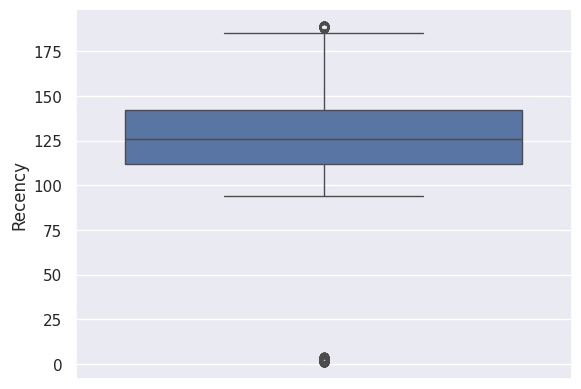

In [ ]:
sns.boxplot(RFMScore['Recency']) # To find the outliers

In [ ]:
RFMScore.Frequency.describe()

count    1428.000000
mean       33.383053
std        45.316635
min         1.000000
25%        10.000000
50%        21.000000
75%        41.000000
max       593.000000
Name: Frequency, dtype: float64

<Axes: ylabel='Frequency'>

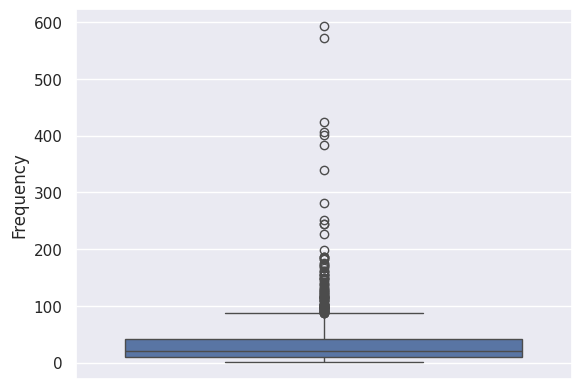

In [ ]:
sns.boxplot(RFMScore.Frequency) # To find the outliers

In [ ]:
RFMScore.Monetary.describe()

count     1428.000000
mean       749.306296
std       2488.712929
min      -1192.200000
25%        170.977500
50%        333.075000
75%        690.072500
max      54609.320000
Name: Monetary, dtype: float64

<Axes: ylabel='Monetary'>

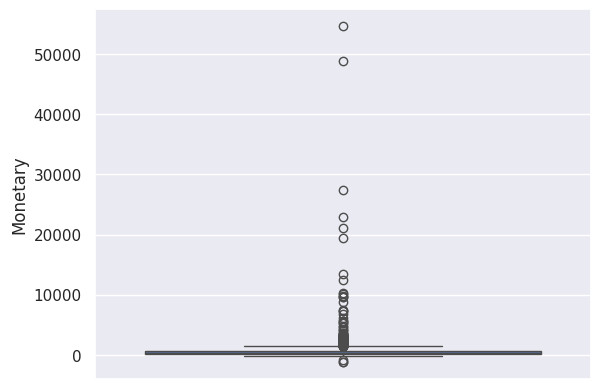

In [ ]:
sns.boxplot(RFMScore.Monetary) # To find the outliers


In [ ]:
quantile = RFMScore.quantile([0.25,0.50,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 112.0, 0.5: 126.0, 0.75: 142.0},
 'Frequency': {0.25: 10.0, 0.5: 21.0, 0.75: 41.0},
 'Monetary': {0.25: 170.97750000000002,
  0.5: 333.07500000000005,
  0.75: 690.0725}}

In [ ]:
def RScore(x,p,d):
  if x<=d[p][0.25]:
    return 1
  elif x<=d[p][0.50]:
    return 2
  elif x<=d[p][0.75]:
    return 3
  else:
    return 4

def FnMscore(x,p,d):
  if x<=d[p][0.25]:
    return 4
  elif x<=d[p][0.50]:
    return 3
  elif x<=d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
RFMScore['R']=RFMScore['Recency'].apply(RScore,args=('Recency',quantile))
RFMScore['F']=RFMScore['Frequency'].apply(FnMscore,args=('Frequency',quantile))
RFMScore['M']=RFMScore['Monetary'].apply(FnMscore,args=('Monetary',quantile))

In [ ]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,142,2,0.00,3,4,4
1,12347.0,134,29,475.39,3,2,2
2,12348.0,135,23,1120.24,3,2,1
3,12350.0,127,17,334.40,3,3,2
4,12352.0,100,26,440.85,1,2,2
...,...,...,...,...,...,...,...
1423,18257.0,113,15,328.40,2,3,3
1424,18260.0,139,40,769.52,3,2,1
1425,18269.0,175,1,-29.70,4,4,4
1426,18277.0,135,1,-12.75,3,4,4


In [ ]:
RFMScore['RFMGroup']=RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)

In [ ]:
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup
CustomerID,,,,,,,
12346.0,142,2,0.00,3,4,4,344
12347.0,134,29,475.39,3,2,2,322
12348.0,135,23,1120.24,3,2,1,321
12350.0,127,17,334.40,3,3,2,332
12352.0,100,26,440.85,1,2,2,122


In [ ]:
RFMScore['RFMsum']=RFMScore[['R','F','M']].sum(axis=1)
RFMScore.head().reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMsum
0,12346.0,142,2,0.00,3,4,4,344,11
1,12347.0,134,29,475.39,3,2,2,322,7
2,12348.0,135,23,1120.24,3,2,1,321,6
3,12350.0,127,17,334.40,3,3,2,332,8
4,12352.0,100,26,440.85,1,2,2,122,5


In [ ]:
RFMScore['RFMsum'].value_counts()

9     200
8     181
6     169
7     162
10    152
5     151
11    112
4     109
3     102
12     90
Name: RFMsum, dtype: int64

Based on the RFMScore['RFMsum'], we can segregate customers.

Lower the RFMsum implies retaining the customer as their contribution to sales is high and they are highly active customers.

In [ ]:
RFMScore.to_csv('Manual_analysis.csv')
